# Interpolación, lo último de lo último....

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

### Ejercicio 1 (Lagrange)
Sea $f(x)=2\sin(\pi x/6)$ (con el ángulo medido ern radianes):
1. Use el polinomio interpolador de Lagrange cuadrático con nodos $x_0=0,x_1=1 y x_2=3$ para aproximar f(2) y f(2.4)
2. Use el polinomio interpolador de Lagrange cuadrático con nodos $x_0=0,x_1=1 y x_2=5$ para aproximar f(2) y f(2.4)
3. Use el polinomio interpolador de Lagrange cuadrático con nodos $x_0=0,x_1=1 y x_2=3$ para aproximar f(4) y f(3.5)
4. Use el polinomio interpolador de Lagrange cúbico con nodos $x_0=0,x_1=1 y x_2=5$ para aproximar f(4) y f(3.5)

### Ejercicio 2 (Newton)

Use los centros $x_0=-3, x_1=-1, x_2=1, x_3=4$ y $x_4=2$ y los coeficientes $a_0=-2, a_1=4, a2=-0.04, a_3=0.06, a_4=0.005$ para hallar los polinomios interpoladores de Newton $P_1(x), P_2(x), P_3(x)$ y $P_4(x)$ y calcule los valores de estos polinomios en $x=2$

# Interpolación mediante polinomio

Si tenemos $N$ puntos, el polinomio generado por estos puntos será de orden menor o igual a $N-1$, pero cuando $N$ empieza a ser grande (10<=N) puede ocurrir, si no escogemos muy cuidadosamente lo puntos, que oscilen salvajemente. Esto se conoce como fenómeno de Runge.

Sea 
$$ f(x)=\frac{1}{1+x^2}$$

Interpolemos con nodos equidistantes, usando el método de interpolación baricéntrica o interpolación polinómica, el cuál recibe la variable a evaluar el polinomio y los nodos, con sus respectivos $x$ y $y$.

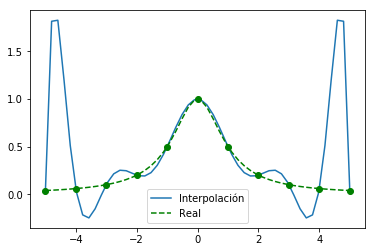

In [27]:
import numpy as np
from scipy.interpolate import barycentric_interpolate
def runge(x):
    """Función de Runge."""
    return 1 / (1 + 1*x ** 2)

def n_interp(x,X,Y):
    if len(X)!= len(Y):
        return ('Vectores con dimensiones distintas')
    else:
        Points=list(zip(X,Y)) #aquí genero los puntos, con las listas dadas por el usuario
        Lk=[] # aquí guardo los polinomios de Lagrange
        n=len(X)
        for i in range(n): #indice lento
            l=1
            for k in range(n): #indice rapido
                if k!=i: 
                    l*=(x-X[k])/float(X[i]-X[k]) #este es el polinomio k-esimo de lagrange 
            Lk.append(l)
        polinomio=0.0
        #print(Lk)
        for i in range(n):
            polinomio+=Lk[i]*Y[i]
        return polinomio

N = 11  # Nodos de interpolación
xp = np.arange(11)- 5  # -5, -4, -3, ..., 3, 4, 5
fp = runge(xp)
x = np.linspace(-5, 5)
y = n_interp(x,xp, fp)
#con nodos equidistantes, la interpolación baricentrica sigue regresando los mismos resultados que Lagrange
y1 = barycentric_interpolate(xp, fp, x) 


l,= plt.plot(x, y)
#l1,= plt.plot(x, y1)
plt.plot(x, runge(x), '--g')
plt.plot(xp, fp, 'o',color='green')
leg = plt.legend(['Interpolación', 'Real'])

Una manera fácil de solucionar esto, es escoger "cuidadosamente" puntos. El mejor truco para esto es usar las raíces de los polinomios de Chebyshev. Para tener 11 nodos, usamos un polinomio de Chebyshev de grado 11.

Un polinomio de Chebyshev de cualquier tipo de grado $N$ tiene $N$ raíces simples distintas, llamadas nodos de Chebyshev, en el intervalo $[-1,1]$. Usando:

$$
T_n(\cos \theta)= \cos (n\theta)
$$

$$
\cos\left(\frac{\pi}{2}(2k+1)\right)=0
$$

con raíces:

$$
x_k=\cos \left( \frac{\pi}{2}\frac{2k-1}{n} \right)
$$

con $k=1,2,\cdots,n$

In [24]:
from numpy.polynomial import chebyshev
coeffs_cheb = [0] * 11 + [1]  # Solo queremos el elemento 11 de la serie
T11 = chebyshev.Chebyshev(coeffs_cheb, [-5, 5])
xp_ch = T11.roots()
# -4.949, -4.548, -3.779, -2.703, ..., 4.548, 4.949 Raíces de los polinomios de Chebyschev
print(xp_ch)

[-4.94910721e+00 -4.54815998e+00 -3.77874787e+00 -2.70320409e+00
 -1.40866278e+00 -1.34623782e-15  1.40866278e+00  2.70320409e+00
  3.77874787e+00  4.54815998e+00  4.94910721e+00]


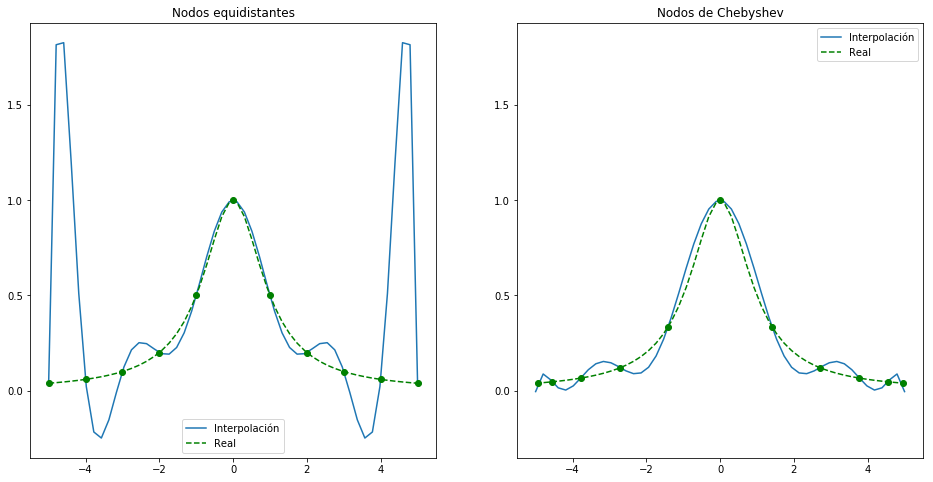

In [33]:
from numpy.polynomial import chebyshev

xp = np.arange(11) - 5  # -5, -4, -3, ..., 3, 4, 5
fp = runge(xp)
x = np.linspace(-5, 5)
y = barycentric_interpolate(xp, fp, x)

coeffs_cheb = [0] *11 + [1]
T11 = chebyshev.Chebyshev(coeffs_cheb, [-5, 5])

xp_ch = T11.roots()
fp_ch = runge(xp_ch)

y_ch = barycentric_interpolate(xp_ch, fp_ch, x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

l1, = ax1.plot(x, y)
ax1.plot(x, runge(x), '--g')
ax1.plot(xp, fp, 'o', color='green')
ax1.set_title("Nodos equidistantes")
leg1 = ax1.legend(['Interpolación', 'Real'])


l2, = ax2.plot(x, y_ch)
ax2.plot(x, runge(x), '--g')
ax2.plot(xp_ch, fp_ch, 'og')
ax2.set_ylim(ax1.get_ylim())
ax2.set_title("Nodos de Chebyshev")
leg2 = ax2.legend(['Interpolación', 'Real'])

En este Notebook usamos la función barycentric_interpolate. Intenta hacer tu propio código de la función baricéntrica. 

In [5]:
#Aquí va tu función.